In [1]:
# Gini impurity 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pos_fraction = np.linspace(0.00,1.00,1000)

In [3]:
gini = 1 - pos_fraction**2 -(1-pos_fraction)**2

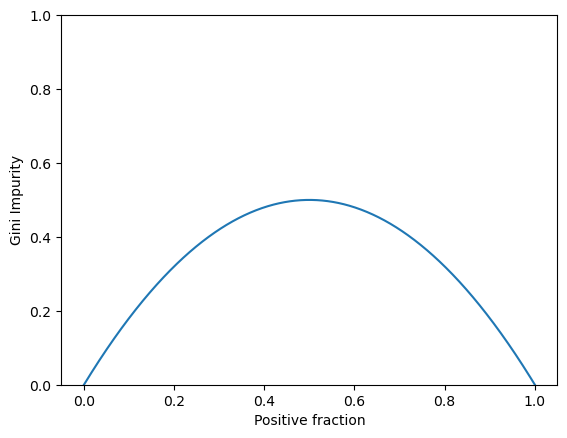

In [4]:
plt.plot(pos_fraction,gini)
plt.ylim(0,1)
plt.xlabel('Positive fraction')
plt.ylabel('Gini Impurity')
plt.show()

In [5]:
def gini_impurity(labels):
    # when the set is empty, it is aslo pure
    if len(labels) ==0:
        return 0
    # count the occurence of each label
    counts = np.unique(labels,return_counts=True)[1]
    fractions = counts/float(len(labels))
    return 1 - np.sum(fractions **2)

In [6]:
print(f'{gini_impurity([1,1,0,1,0]):.4f}')

0.4800


In [7]:
print(f'{gini_impurity([1,1,0,1,0,0,1,1,0,1,1,1]):.4f}')

0.4444


In [8]:
print(f'{gini_impurity([1,1,1,1,1]):.4f}')

0.0000


In [9]:
labels = [1,1,1,0,0]
counts = np.unique(labels,return_counts=True)
print(counts[1])

[2 3]


In [10]:
fractions = counts[1]/float(len(labels))
print(fractions)

[0.4 0.6]


In [11]:
print(1-np.sum(fractions**2))

0.48


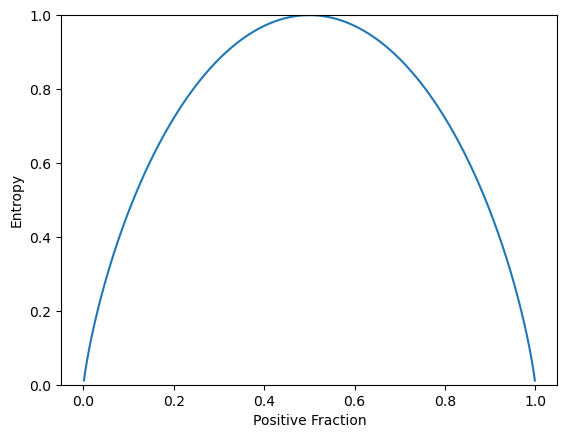

In [12]:
pos_fraction = np.linspace(0.001,0.999,1000)
ent = -(pos_fraction*np.log2(pos_fraction) + (1-pos_fraction)*np.log2(1-pos_fraction))
plt.plot(pos_fraction,ent)
plt.xlabel('Positive Fraction')
plt.ylabel('Entropy')
plt.ylim(0,1)
plt.show()

In [13]:
def entropy(labels):
    if len(labels) == 0:
        return 0
    counts = np.unique(labels,return_counts=True)[1]
    fractions = counts/float(len(labels))
    return -np.sum(fractions*np.log2(fractions))

In [14]:
print(f'{entropy([1,1,0,1,0]):.4f}')

0.9710


In [15]:
print(f'{entropy([1,1,0,1,0,0]):.4f}')

1.0000


In [16]:
print(f'{entropy([1,1,1,1,1]):.4f}')

-0.0000


In [17]:
# making function to calculate the weighted impurity 
criterion_function = {'gini' : gini_impurity,
                      'entropy' : entropy}
def weighted_impurity(groups,criterion='gini'):
    # Groups - list of children and a cchild consists a list of class labels
    total = sum(len(group) for group in groups)
    weighted_sum = 0.0
    for group in groups: 
        weighted_sum += len(group)/float(total)*criterion_function[criterion](group)
    return weighted_sum

In [18]:
children1 = [[1,0,1],[0,1]]
children2 = [[1,1],[0,0,1]]
print(f'Entropy of #1 split: {weighted_impurity(children1,'entropy'):.4f}')
print(f'Entropy of #2 split: {weighted_impurity(children2,'entropy'):.4f}')

Entropy of #1 split: 0.9510
Entropy of #2 split: 0.5510


In [19]:
Gini_tech = weighted_impurity([[1,1,0],[0,0,0,1]])
print(f'Gini(interest,tech): {Gini_tech:.4f}')

Gini(interest,tech): 0.4048


In [20]:
Gini_sports = weighted_impurity([[0,1],[1,0,0,1,0]])
print(f'Gini(interest,sports): {Gini_sports:.4f}')

Gini(interest,sports): 0.4857


In [21]:
Gini_fashion= weighted_impurity([[0,0],[1,0,1,0,1]])
print(f'Gini(interest,tech): {Gini_fashion:.4f}')

Gini(interest,tech): 0.3429


In [25]:
# creating function to split node
def split_node(X,y,index,value):
    """ X : Features
        y: Label 
        index: number of instances
        value = comparison value to split node
    """
    # Getting the value of feature  according to column index
    x_index = X[:,index]
    # if feature is numerical
    if X[0,index].dtype.kind in ['i','f']:
        # Getting the Boolean in mask by comparing with values
        mask = x_index >=value
    # if feature is categorical
    else:
        mask = x_index == value
    # split into left and child node
    # left contains false boolean and right contains Trur boolean
    left = [X[~mask,:],y[~mask]]
    right = [X[mask,:],y[mask]]
    return left,right

In [45]:
# Making function for greedy search for seraching through all features and gives best criterion
def get_best_split(X,y,criterion):
    # Assiging the value to constant
    best_index,best_value,best_score,children = None,None,1,None
    # iterating through all features 
    for index in range(len(X[0])):
    # Looking through the features and removing duplicates and sorting in ascending order
        for value in np.sort(np.unique(X[:,index])):
            groups= split_node(X,y,index,value)
            impurity = weighted_impurity([groups[0][1],groups[1][1]],criterion)
            if impurity < best_score:
                best_index,best_value,best_score,children = index,value,impurity,groups
    return {'index': 'best_index','value':best_value,'children':children}

In [46]:
def get_leaf(labels):
    # obtain the leaf as majority of the labels
    return np.bincount(labels).argmax()

In [47]:
# checking for nodes and assiging it to leafs
def split(node,max_depth,min_size,depth,criterion):
    left,right = node['children']
    del (node['children'])
    # if one of two node is empty assign the node as leaf
    if left[1].size == 0:
        node['right'] = get_leaf(right[1])
        return
    if right[1].size == 0:
        node['left'] = get_leaf(leaf[1])
        return
    # check if current depth exceeds the maximal depth
    if depth >= max_depth:
        node['left'],node['right'] = get_leaf(left[1]),get_leaf(right[1])
        return
    # check the left child has enough samples
    if left[1].size <=min_size:
        node['left'] = get_leaft(left[1])
    else:
        # It has enough samples, we further split it
        result = get_best_split(left[0],left[1],criterion)
        result_left,result_right = result['children']
        if result_left[1].size ==0:
            node['left'] = get_leaf(result_right[1])
        elif result_right[1].size ==0:
            node['left'] = get_leaf(result_left[1])
        else:
            node['left'] = result
            split(node['left'],max_depth,min_size,depth+1,criterion)
    # check the right child has enough samples
    if right[1].size <=min_size:
        node['right'] = get_leaf(right[1])
    else:
        # It has enough samples we further split it 
        result = get_best_split(right[0],right[1],criterion)
        result_left,result_right = result['children']
        if result['left'].size == 0:
            node['right'] = get_leaf(result_right[1])
        elif result['right'].size == 0:
            node['right'] = get_leaft(result_left[1])
        else:
            node['right'] = result
            split(node['right'],max_depth,min_size,depth + 1,criterion)

In [48]:
# making the function to train 
def train_tree(X_train,y_train,max_depth,min_size,criterion='gini'):
    X = np.array(X_train)
    y = np.array(y_train)
    root = get_best_split(X,y,criterion)
    split(root,max_depth,min_size,1,criterion)
    return root

In [49]:
X_train = [['tech','professional'],
           ['fashion','student'],
           ['fashion','professional'],
           ['sports','student'],
           ['tech','student'],
           ['tech','retired'],
           ['sports','professional']]
y_train = [1,0,0,0,1,0,1]
tree= train_tree(X_train,y_train,2,2)